**1. Importing Required Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Reading Data**

In [4]:
dataset_UCI = pd.read_csv('/content/Online Retail.csv')

In [5]:
dataset_UCI.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
dataset_UCI.shape

(541909, 8)

In [7]:
dataset_UCI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
dataset_UCI.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
dataset_UCI.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [10]:
dataset_UCI.duplicated().sum()

np.int64(5268)

In [11]:
dataset_UCI.drop_duplicates(inplace=True)

In [12]:
dataset_UCI.duplicated().sum()

np.int64(0)

In [13]:
dataset_UCI.shape

(536641, 8)

In [14]:
dataset_UCI.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


In [15]:
import pandas as pd

# On suppose que ton DataFrame s'appelle df

# Étape 1 : repérer les factures (InvoiceNo) concernées
invoice_with_mixed_customers = (
    dataset_UCI.groupby("InvoiceNo")["CustomerID"]
    .apply(lambda x: x.isna().any() and x.notna().any())
)

# Étape 2 : filtrer les factures problématiques
invoice_with_mixed_customers = invoice_with_mixed_customers[invoice_with_mixed_customers].index

# Étape 3 : afficher les lignes correspondantes
df_problem = dataset_UCI[dataset_UCI["InvoiceNo"].isin(invoice_with_mixed_customers)]

# Afficher le résultat
print(df_problem[["InvoiceNo", "CustomerID"]].sort_values("InvoiceNo").head(10))


Empty DataFrame
Columns: [InvoiceNo, CustomerID]
Index: []


In [16]:
# On cherche les StockCode ayant plusieurs descriptions distinctes
diff_desc = (
    dataset_UCI.groupby("StockCode")["Description"]
    .nunique()
    .reset_index()
)

# On garde seulement les StockCode avec plus d'une description
diff_desc = diff_desc[diff_desc["Description"] > 1]
diff_desc.head()


,StockCode,Description
1,10080,2
8,10133,2
26,15058A,2
28,15058C,2
31,16008,2


In [17]:
# Lister les descriptions de ces produits
df_problem = dataset_UCI[dataset_UCI["StockCode"].isin(diff_desc["StockCode"])]
df_problem = df_problem[["StockCode", "Description"]].drop_duplicates().sort_values("StockCode")
df_problem.head(20)


,StockCode,Description
279310,10080,NaN
454350,10080,check
103332,10080,GROOVY CACTUS INFLATABLE
741,10133,COLOURING PENCILS BROWN TUBE
474647,10133,damaged
192289,15058A,wet/rusty
23437,15058A,BLUE POLKADOT GARDEN PARASOL
108588,15058A,NaN
81425,15058C,ICE CREAM DESIGN GARDEN PARASOL
192290,15058C,wet/rusty


In [18]:
dataset_UCI = dataset_UCI.dropna()

In [19]:
dataset_UCI.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [20]:
dataset_UCI.shape

(401604, 8)

In [21]:
df_UCI =  dataset_UCI[~dataset_UCI['InvoiceNo'].str.startswith('C')]

In [22]:
df_UCI.shape

(392732, 8)

In [23]:
df_UCI.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


**3. Convert InvoiceDate to Datetime**

In [24]:
df_UCI['InvoiceDate'] = pd.to_datetime(df_UCI['InvoiceDate'])

/tmp/ipython-input-4025923993.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_UCI['InvoiceDate'] = pd.to_datetime(df_UCI['InvoiceDate'])
/tmp/ipython-input-4025923993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UCI['InvoiceDate'] = pd.to_datetime(df_UCI['InvoiceDate'])


In [25]:
(df_UCI['Quantity'] < 0).sum()


np.int64(0)

**Feature engineering**

In [26]:
df_UCI['TotalPrice'] = df_UCI['Quantity'] * df_UCI['UnitPrice']

/tmp/ipython-input-82886433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UCI['TotalPrice'] = df_UCI['Quantity'] * df_UCI['UnitPrice']


In [27]:
df_UCI.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


**Calculate Recency**

In [28]:
df_recency = df_UCI.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_recency.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


In [29]:
df_recency['Recency'].describe()

,Recency
count,4339.000000
mean,91.518322
std,100.009747
min,0.000000
25%,17.000000
50%,50.000000
75%,141.000000
max,373.000000


**Calculate Frequency**

In [30]:
frequency_df = df_UCI.drop_duplicates().groupby(by=['CustomerID'], as_index=False)['InvoiceDate'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [31]:
frequency_df['Frequency'].describe()

,Frequency
count,4339.000000
mean,90.512100
std,225.515328
min,1.000000
25%,17.000000
50%,41.000000
75%,98.000000
max,7676.000000


**Calculate Monetary Value**

In [32]:
#df_UCI['Total'] = df['TransactionAmount']  # Total spent by each customer
monetary_df = df_UCI.groupby(by='CustomerID', as_index=False)['TotalPrice'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


**Merge Recency, Frequency and Monetary Data**

In [33]:
rf_df = df_recency.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(columns='LastPurchaseDate')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


**Rank Customers Based on Recency, Frequency and Monetary**

In [34]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

In [35]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,12346.0,325,1,77183.60,161.0,36.5,4330.0
1,12347.0,1,182,4310.00,4203.5,3828.5,4005.0
2,12348.0,74,31,1797.24,1653.0,1838.0,3336.0
3,12349.0,18,73,1757.55,3182.0,2911.5,3313.0
4,12350.0,309,17,334.40,230.5,1083.0,1243.0


**Normalize the Ranks**

In [36]:
rfm_df['R_rank_norm'] = (rfm_df['R_rank'] / rfm_df['R_rank'].max()) * 100
rfm_df['F_rank_norm'] = (rfm_df['F_rank'] / rfm_df['F_rank'].max()) * 100
rfm_df['M_rank_norm'] = (rfm_df['M_rank'] / rfm_df['M_rank'].max()) * 100

In [37]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,325,1,77183.60,161.0,36.5,4330.0,3.750291,0.841208,99.792579
1,12347.0,1,182,4310.00,4203.5,3828.5,4005.0,97.915211,88.234616,92.302374
2,12348.0,74,31,1797.24,1653.0,1838.0,3336.0,38.504542,42.359991,76.884075
3,12349.0,18,73,1757.55,3182.0,2911.5,3313.0,74.120662,67.100714,76.353999
4,12350.0,309,17,334.40,230.5,1083.0,1243.0,5.369206,24.959668,28.647154


In [38]:
rfm_df['M_rank_norm'].describe()

,M_rank_norm
count,4339.000000
mean,50.011523
std,28.870840
min,0.023047
25%,25.017285
50%,50.011523
75%,75.005762
max,100.000000


In [39]:
#rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,325,1,77183.60,161.0,36.5,4330.0,3.750291,0.841208,99.792579
1,12347.0,1,182,4310.00,4203.5,3828.5,4005.0,97.915211,88.234616,92.302374
2,12348.0,74,31,1797.24,1653.0,1838.0,3336.0,38.504542,42.359991,76.884075
3,12349.0,18,73,1757.55,3182.0,2911.5,3313.0,74.120662,67.100714,76.353999
4,12350.0,309,17,334.40,230.5,1083.0,1243.0,5.369206,24.959668,28.647154


**Calculate RFM Score**

We calculate the RFM score by assigning different weights to Recency, Frequency and Monetary values. The weights are based on the business goals, with Monetary given the highest weight.

In [40]:
rfm_df['RFM_Score'] = 0.15 * rfm_df['R_rank_norm'] + 0.28 * rfm_df['F_rank_norm'] + 0.57 * rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)

In [41]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,12346.0,325,1,77183.60,161.0,36.5,4330.0,3.75,0.84,99.79,2.88
1,12347.0,1,182,4310.00,4203.5,3828.5,4005.0,97.92,88.23,92.30,4.60
2,12348.0,74,31,1797.24,1653.0,1838.0,3336.0,38.50,42.36,76.88,3.07
3,12349.0,18,73,1757.55,3182.0,2911.5,3313.0,74.12,67.10,76.35,3.67
4,12350.0,309,17,334.40,230.5,1083.0,1243.0,5.37,24.96,28.65,1.21


**Display RFM Score and CustomerID**

In [42]:
rfm_df[['CustomerID', 'RFM_Score']].head()

,CustomerID,RFM_Score
0,12346.0,2.88
1,12347.0,4.60
2,12348.0,3.07
3,12349.0,3.67
4,12350.0,1.21


In [43]:
rfm_df['RFM_Score'].max()


5.0

In [44]:
rfm_df['RFM_Score'].min()

0.02

**Segment Customers Based on RFM Score**

We classify customers into different segments based on their RFM scores. This helps to categorize them into groups like Top Customers, High Value Customers, etc.






In [45]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 4.5, "Top Customers",
                                       np.where(rfm_df['RFM_Score'] > 4, "High value Customer",
                                                np.where(rfm_df['RFM_Score'] > 3, "Medium Value Customer",
                                                         np.where(rfm_df['RFM_Score'] > 1.6, 'Low Value Customers', 'Lost Customers'))))

**Display Customer Segments**

In [46]:
rfm_df.head(-10)

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,12346.0,325,1,77183.60,161.0,36.5,4330.0,3.75,0.84,99.79,2.88,Low Value Customers
1,12347.0,1,182,4310.00,4203.5,3828.5,4005.0,97.92,88.23,92.30,4.60,Top Customers
2,12348.0,74,31,1797.24,1653.0,1838.0,3336.0,38.50,42.36,76.88,3.07,Medium Value Customer
3,12349.0,18,73,1757.55,3182.0,2911.5,3313.0,74.12,67.10,76.35,3.67,Medium Value Customer
4,12350.0,309,17,334.40,230.5,1083.0,1243.0,5.37,24.96,28.65,1.21,Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...,...
4324,18265.0,71,46,801.51,1723.5,2327.5,2420.0,40.15,53.64,55.77,2.64,Low Value Customers
4325,18268.0,133,1,25.50,1132.5,36.5,13.5,26.38,0.84,0.31,0.22,Lost Customers
4326,18269.0,365,7,168.60,64.0,407.0,508.0,1.49,9.38,11.71,0.48,Lost Customers
4327,18270.0,37,11,283.15,2460.5,698.5,980.0,57.31,16.10,22.59,1.30,Lost Customers


**Visualize Customer Segments**

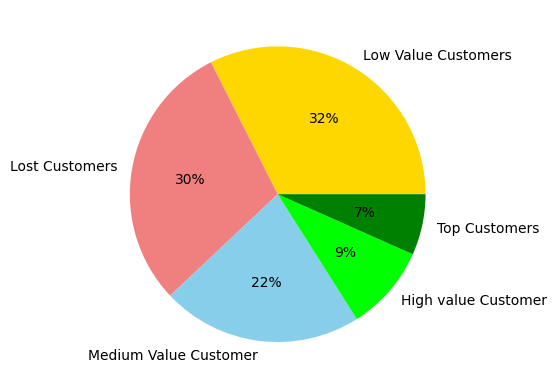

In [47]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        colors= ['gold', 'lightcoral', 'skyblue', 'lime', 'green'],
        autopct='%.0f%%')
plt.show()

**Distribution of Score RFM**

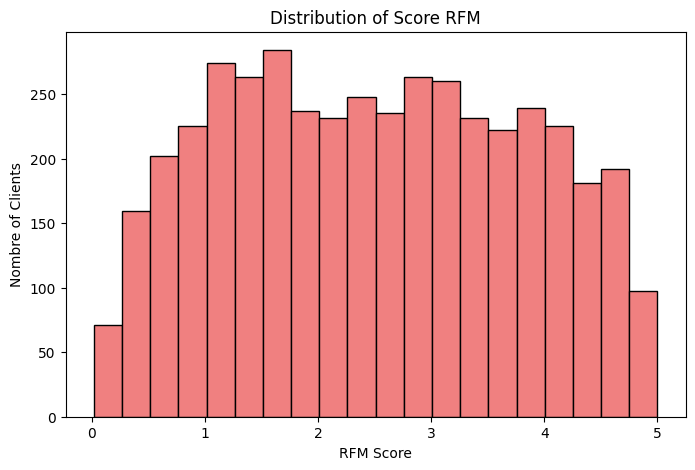

In [48]:
plt.figure(figsize=(8,5))
plt.hist(rfm_df['RFM_Score'], bins=20, color='lightcoral', edgecolor='black')
plt.title("Distribution of Score RFM")
plt.xlabel("RFM Score")
plt.ylabel("Nombre of Clients")
plt.show()


**Total Customers /
Total Orders /
Total Sales /
Total Quantity**

In [49]:
Total_Customers = rfm_df['CustomerID'].count()
print('Total Customers :', Total_Customers )
Total_Orders = rfm_df['Frequency'].sum()
print('Total Orders :', Total_Orders)
Total_Sales = rfm_df['Monetary'].sum()
print('Total Sales :', Total_Sales)
Total_Quantity = df_UCI['Quantity'].sum()
print('Total Quantity :', Total_Quantity)

Total Customers : 4339
Total Orders : 392732
Total Sales : 8887208.89
Total Quantity : 5165886


**Sales Trend Over Time**

/tmp/ipython-input-3649345547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UCI['Date'] = df_UCI['InvoiceDate'].dt.date


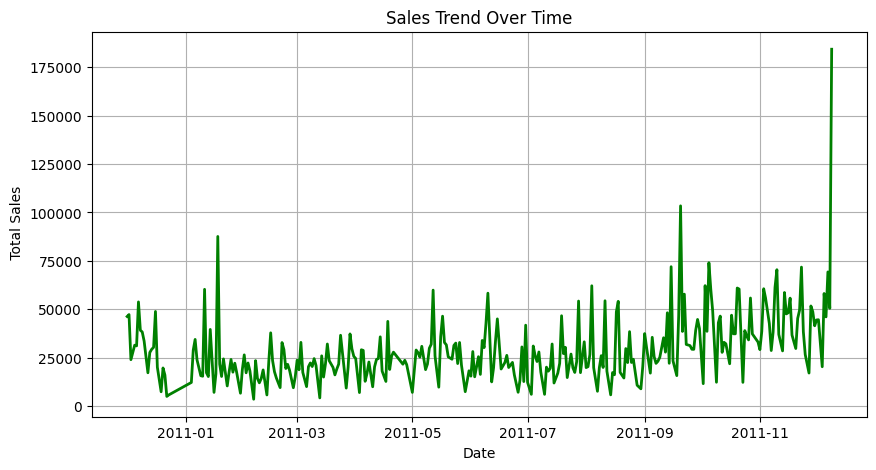

In [50]:
df_UCI['Date'] = df_UCI['InvoiceDate'].dt.date
sales_by_date = df_UCI.groupby('Date', as_index=False)['TotalPrice'].sum()
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(sales_by_date['Date'], sales_by_date['TotalPrice'], color='green', linewidth=2)
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel(" Total Sales")
plt.grid(True)
plt.show()




**Heatmap of Recency vs Frequency (Average Monetary)**

/tmp/ipython-input-4269272807.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm_pivot = rfm_df.pivot_table(


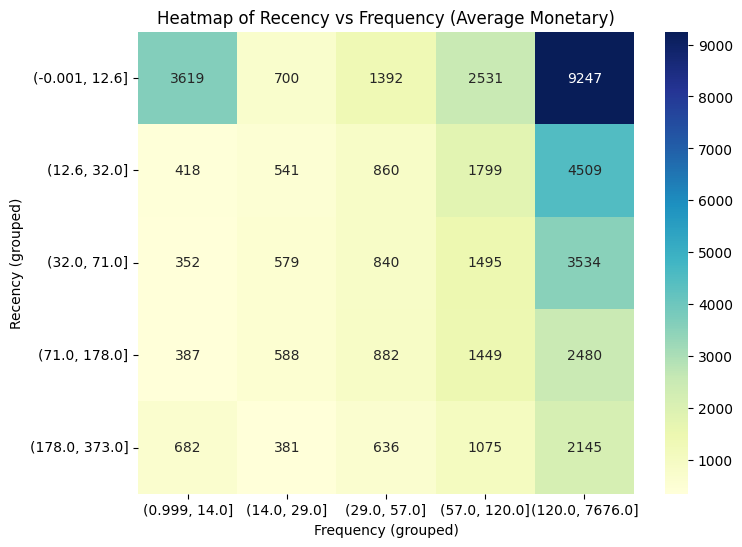

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Exemple : on regroupe par Frequency et Recency, et on regarde la moyenne du Monetary
rfm_pivot = rfm_df.pivot_table(
    index=pd.qcut(rfm_df['Recency'], 5, duplicates='drop'),  # 5 classes de récence
    columns=pd.qcut(rfm_df['Frequency'], 5, duplicates='drop'),  # 5 classes de fréquence
    values='Monetary',
    aggfunc='mean'
)

plt.figure(figsize=(8,6))
sns.heatmap(rfm_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap of Recency vs Frequency (Average Monetary)')
plt.xlabel('Frequency (grouped)')
plt.ylabel('Recency (grouped)')
plt.show()


In [52]:
df_UCI['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

**Summary of Total Sales, Quantity, and Customers per Country**

In [62]:
#  Grouper les données par pays
info_by_Cn = df_UCI.groupby('Country').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum',
    'CustomerID': 'nunique'
}).reset_index()

#  Renommer les colonnes pour plus de clarté
info_by_Cn.columns = ['Country', 'Total Sales', 'Total Quantity', 'Number of Customers']
info_by_Cn = info_by_Cn.sort_values(by='Number of Customers', ascending=False)
info_by_Cn


,Country,Total Sales,Total Quantity,Number of Customers
35,United Kingdom,7285024.644,4254037,3921
14,Germany,228678.400,119156,94
13,France,208934.310,111429,87
30,Spain,61558.560,27944,30
3,Belgium,41196.340,23237,25
32,Switzerland,56443.950,30083,21
26,Portugal,33375.840,16095,19
18,Italy,17483.240,8112,14
12,Finland,22546.080,10704,12
1,Austria,10198.680,4881,11
